In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 4, 5])

In [3]:
dic = {
    "X":x,
    "Y":y
}

df = pd.DataFrame(dic)
df

,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


### Goal -: To find the best fit line using Least Square Method

### In order to find that, we need have the equation of line,

- The equation of Regression line is give by,
- $Y = MX + C$
    - where
        - Y is dependent variable
        - X is independent variable
        - M is coefficient of regression(slope/ gradient)
        - C is intercept (the point where line meets at y-axis)

however, the value of m & c is unknown, so first we need to find the value of "m", which is give by,


![title](slope.png)

- where,
    - xdash is mean of x
    - ydash is mean of y

In [4]:
x

array([1, 2, 3, 4, 5])

In [5]:
y

array([3, 4, 2, 4, 5])

In [6]:
xmean = x.mean()
ymean = y.mean()

print(f"The Mean of X : {xmean}")
print(f"The Mean of Y : {ymean}")

The Mean of X : 3.0
The Mean of Y : 3.6


In [7]:
m = sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
print(f"The Coefficient of Regression (or slope): {m}")

The Coefficient of Regression (or slope): 0.4


In [8]:
#ymean = xmean * m + c
#c = ymean - (m*xmean)
c = ymean - (m*xmean)

print(f"The intercept of Regression line : {c}")

The intercept of Regression line : 2.4


In [9]:
def linreg(x):
    return (m*x+c)

In [10]:
x

array([1, 2, 3, 4, 5])

In [11]:
ypred = np.array(list(map(linreg, x)))

In [12]:
ypred

array([2.8, 3.2, 3.6, 4. , 4.4])

In [13]:
dic ={
    "X":x,
    "Actual Y":y,
    "Predicted Y":ypred
}

df = pd.DataFrame(dic)
df

,X,Actual Y,Predicted Y
0,1,3,2.8
1,2,4,3.2
2,3,2,3.6
3,4,4,4.0
4,5,5,4.4


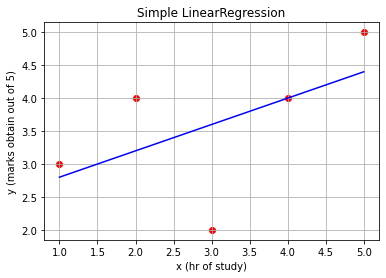

In [14]:
plt.scatter(x,y, color="red")
plt.plot(x, ypred, color="blue")

plt.title("Simple LinearRegression")
plt.xlabel("x (hr of study)")
plt.ylabel("y (marks obtain out of 5)")
plt.grid()
plt.show()

### Sum of Squared Residuals

In [15]:
sum((y-ypred)**2)

3.5999999999999996

### Mean Absolute Error

In [16]:
sum(abs(y-ypred))/len(y)

0.6399999999999999

### Mean Squared Error

In [17]:
sum((y-ypred)**2)/len(y)

0.72

### Root Mean Square Error

In [18]:
np.sqrt(sum((y-ypred)**2)/len(y))

0.848528137423857

### R Squared

- R-squared value is statistical measure to know how close the data are from the fitted regression line.
- It is also known as Coefficient of Multiple Determination
- The equation of R-squared is given by,
![title](r2.png)

In [19]:
r2 = sum((ypred-ymean)**2)/sum((y-ymean)**2)
print(f"The R-squared value is {r2}")

The R-squared value is 0.3076923076923078


- By observing the r2 value, we can conclude that the regresssion line is not good fit and it also suggest the actual value of Y is far away from the predicted value of Y.
- The r2 value lies between 0-1, the bigger the r2 value the better the regression model will be.
- If you are predicting human behaviour then 0.3 is also a good value.
- If you are predicting medicine results then accuracy should be above 0.98 i.e 98%

### Test The Model on New Observation

In [20]:
linreg(6)

4.800000000000001

In [ ]:
newob = float(input("Enter No of Hrs of Study -: "))
print(f"You will score {linreg(newob)} marks out of 5")